# IPL Analysis Project

## Objective

The objective of this project is to perform a comprehensive statistical analysis of IPL (Indian Premier League) match data to uncover patterns and insights related to team performance. The analysis focuses on comparing team scoring behavior across different contexts, such as league vs playoff matches, home vs away games, and trends over seasons. By leveraging data cleaning, feature engineering, visualization, and statistical testing, the project aims to answer key questions about IPL team consistency, scoring trends, and the impact of match conditions on performance.

## Overview and Insights according to the Project

This project presents a comprehensive statistical analysis of IPL (Indian Premier League) match data, focusing on team performance across various contexts such as league vs playoff matches, home vs away games, and trends over seasons. The analysis leverages data cleaning, feature engineering, visualization, and hypothesis testing to uncover patterns and answer key questions about IPL team scoring behavior.

### Key Steps and Methods

- **Data Preparation:** The dataset is cleaned and enhanced with new features, including total runs per match, run rate, playoff indicators, and home/away status.
- **Exploratory Analysis:** Visualizations such as box plots, violin plots, bar charts, and line graphs are used to compare team performance in different scenarios.
- **Statistical Testing:** Normality tests, Mann–Whitney U tests, and effect size calculations (Cohen's d) assess the significance and practical impact of observed differences.
- **Bootstrapping:** Confidence intervals for mean differences are estimated using bootstrapping, providing robust inference without distributional assumptions.
- **Regression Analysis:** Linear regression models reveal trends in average team scores over the years.

### Main Findings

- **League vs Playoff Matches:** There is no statistically significant difference in total runs or run rates between league and playoff matches for any team, indicating consistent performance under playoff pressure.
- **Home vs Away Matches:** Teams do not show a significant home advantage in terms of total runs scored.
- **Team Consistency:** Teams like Chennai Super Kings and Mumbai Indians demonstrate high consistency in playoff qualifications and scoring across seasons.
- **Scoring Trends:** Average runs per match have increased over the years, reflecting evolving strategies and gameplay in the IPL.
- **Statistical Robustness:** Bootstrapping and effect size analysis confirm that observed differences are negligible or small, supporting the reliability of conclusions.

### Conclusion

The IPL analysis provides valuable insights into team performance dynamics, highlighting the league's competitive balance and the lack of significant scoring differences across match types and venues. The use of advanced statistical methods ensures robust and interpretable results, making this project a useful resource for sports analysts, fans, and researchers interested in cricket analytics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_data.csv')
match_data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8516\629499393.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_data.csv')


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [3]:
match_info_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_info_data.csv')
match_info_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


## Data Cleaning and Feature Engineering

Converting Date coluymn to Date object

In [4]:
match_info_data['date'] = pd.to_datetime(match_info_data['date'])

Calculating total runs scored by each team in a match

In [5]:
match_info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1024 non-null   int64         
 1   season           1024 non-null   object        
 2   city             973 non-null    object        
 3   date             1024 non-null   datetime64[ns]
 4   team1            1024 non-null   object        
 5   team2            1024 non-null   object        
 6   toss_winner      1024 non-null   object        
 7   toss_decision    1024 non-null   object        
 8   result           1024 non-null   object        
 9   dl_applied       1024 non-null   int64         
 10  winner           1005 non-null   object        
 11  win_by_runs      1024 non-null   int64         
 12  win_by_wickets   1024 non-null   int64         
 13  player_of_match  1019 non-null   object        
 14  venue            1024 non-null   object 

In [6]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243817 non-null  int64  
 1   season                  243817 non-null  object 
 2   start_date              243817 non-null  object 
 3   venue                   243817 non-null  object 
 4   innings                 243817 non-null  int64  
 5   ball                    243817 non-null  float64
 6   batting_team            243817 non-null  object 
 7   bowling_team            243817 non-null  object 
 8   striker                 243817 non-null  object 
 9   non_striker             243817 non-null  object 
 10  bowler                  243817 non-null  object 
 11  runs_off_bat            243817 non-null  int64  
 12  extras                  243817 non-null  int64  
 13  wides                   7652 non-null    float64
 14  noballs             

In [7]:
match_data[['runs_off_bat','extras']]

,runs_off_bat,extras
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0
...,...,...
243812,0,1
243813,1,0
243814,0,0
243815,0,1


So basically we need to add the runs of bats and extras to see the total run in the ball and then grouping by the id we get the total runs by a team

In [8]:
match_data['runs'] = match_data['runs_off_bat'] + match_data['extras']

In [9]:
match_grp = match_data.groupby(['match_id','batting_team'])

In [10]:
# Calculate total runs scored by each team in each match
total_runs_by_team = match_data.groupby(['match_id', 'batting_team'])['runs'].sum().reset_index()
total_runs_by_team.rename(columns={'runs': 'runs'}, inplace=True)
total_runs_by_team.head()

,match_id,batting_team,runs
0,335982,Kolkata Knight Riders,222
1,335982,Royal Challengers Bangalore,82
2,335983,Chennai Super Kings,240
3,335983,Kings XI Punjab,207
4,335984,Delhi Daredevils,132


In [11]:
# Pivot total_runs_by_team to get runs for each team per match as separate columns for inning 1 and 2
inning_runs = total_runs_by_team.copy()
inning_runs['inning'] = inning_runs.groupby('match_id').cumcount() + 1
pivoted = inning_runs.pivot(index='match_id', columns='inning', values='runs').reset_index()
pivoted.columns = ['match_id', 'inning1_runs', 'inning2_runs']

# Merge with match_info_data to get 1024 rows (one per match)
match_info_with_innings = match_info_data.merge(
    inning_runs,
    left_on='id',
    right_on='match_id',
    how='left'
)
match_info_with_innings = match_info_with_innings.drop(columns=['match_id'])
match_info_with_innings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2045 non-null   int64         
 1   season           2045 non-null   object        
 2   city             1943 non-null   object        
 3   date             2045 non-null   datetime64[ns]
 4   team1            2045 non-null   object        
 5   team2            2045 non-null   object        
 6   toss_winner      2045 non-null   object        
 7   toss_decision    2045 non-null   object        
 8   result           2045 non-null   object        
 9   dl_applied       2045 non-null   int64         
 10  winner           2010 non-null   object        
 11  win_by_runs      2045 non-null   int64         
 12  win_by_wickets   2045 non-null   int64         
 13  player_of_match  2038 non-null   object        
 14  venue            2045 non-null   object 

In [12]:
match_info_data = match_info_with_innings

In [13]:
match_info_data['season'].value_counts().sort_index()

season
2007/08    116
2009       114
2009/10    120
2011       145
2012       148
2013       152
2014       120
2015       117
2016       120
2017       118
2018       120
2019       120
2020/21    120
2021       120
2022       148
2023       147
Name: count, dtype: int64

In [14]:
match_info_data['season'] = match_info_data['season'].apply(lambda x:'2020' if x == '2020/21' else x)
match_info_data['season'] = match_info_data['season'].apply(lambda x:'2010' if x == '2009/10' else x)
match_info_data['season'] = match_info_data['season'].apply(lambda x:'2008' if x == '2007/08' else x)
match_info_data['season'].value_counts()
match_info_data['season'] = match_info_data['season'].astype('int')
match_info_data['Period'] = match_info_data['season'].apply(lambda x:'Pre' if x < 2018 else 'Post')

In [15]:
match_info_data['Period']

0       Post
1       Post
2       Post
3       Post
4       Post
        ... 
2040     Pre
2041     Pre
2042     Pre
2043     Pre
2044     Pre
Name: Period, Length: 2045, dtype: object

In [16]:
match_info_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,batting_team,runs,inning,Period
0,1370353,2023,Ahmedabad,2023-05-29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,...,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,Chennai Super Kings,171,1,Post
1,1370353,2023,Ahmedabad,2023-05-29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,...,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,Gujarat Titans,214,2,Post
2,1370352,2023,Ahmedabad,2023-05-26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal,Gujarat Titans,233,1,Post
3,1370352,2023,Ahmedabad,2023-05-26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal,Mumbai Indians,171,2,Post
4,1370351,2023,Chennai,2023-05-24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,...,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney,Lucknow Super Giants,101,1,Post


In [17]:
match_info_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'batting_team', 'runs', 'inning', 'Period'],
      dtype='object')

In [18]:
match_info_data['run_rate'] = match_info_data['runs'] / 20

In [19]:
match_info_data['year'] = match_info_data['season']

## Deciding Between Parametric and Non-Parametric Statistical Methods

To determine whether to use parametric or non-parametric statistical methods for further analysis, we need to assess the distribution of our key variable(s), such as `Total_runs`. If the data is approximately normally distributed, parametric tests (like t-tests or ANOVA) are appropriate. If the data significantly deviates from normality, non-parametric tests (like Mann-Whitney U or Kruskal-Wallis) are more suitable.

Based on the results of the Shapiro-Wilk normality tests performed above, we can make an informed decision in the next cell.

#### Additional Considerations

- **Sample Size:** With large sample sizes, the Central Limit Theorem suggests that the sampling distribution of the mean will be approximately normal, even if the data itself is not perfectly normal. However, for smaller samples or when comparing subgroups (e.g., Pre vs. Post periods), checking normality remains important.
- **Outliers and Skewness:** If the data contains significant outliers or is heavily skewed, non-parametric methods may provide more robust results.
- **Homogeneity of Variance:** Parametric tests also assume equal variances across groups. If this assumption is violated, alternative methods or corrections may be needed.

In summary, the choice between parametric and non-parametric methods should be guided by the distributional properties of the data, sample size, and the specific research questions being addressed. The normality tests belove provide a statistical basis for this decision.

In [20]:
from scipy.stats import shapiro

_,p_value = shapiro(match_info_data['runs'])

print(p_value)

if p_value > 0.05:
    print('The data is Normaly Distributed')
else:
    print('The data is not Normaly Distributed')
    

7.733503061062228e-09
The data is not Normaly Distributed


In [21]:
_,p_value_pre = shapiro(match_info_data[match_info_data['Period'] == 'Pre'].sample(500,replace=True)['runs'])

print(p_value_pre)

if p_value_pre > 0.05:
    print('The data is Normaly Distributed')
else:
    print('The data is not Normaly Distributed')

0.004074669762033378
The data is not Normaly Distributed


In [22]:
_,p_value_post = shapiro(match_info_data[match_info_data['Period'] == 'Post'].sample(500,replace=True)['runs'])

print(p_value_post)

if p_value_post > 0.05:
    print('The data is Normaly Distributed')
else:
    print('The data is not Normaly Distributed')

0.004177404596170615
The data is not Normaly Distributed


## Adding Playoff data

In [23]:
pd.DataFrame(match_info_data[match_info_data['season']==2013]['id'].sort_values(ascending=False)[:8])

,id
1250,598073
1251,598073
1252,598072
1253,598072
1254,598071
1255,598071
1256,598070
1257,598070


In [24]:
playoff = pd.DataFrame()
for i in match_info_data['season'].unique():
    playoff = pd.concat([playoff,pd.DataFrame(match_info_data[match_info_data['season']==i]['id'].sort_values(ascending=False)[:8])],ignore_index=True)

In [25]:
match_info_data['Playoff'] = match_info_data['id'].apply(lambda x:1 if x in playoff['id'].values else 0)

In [26]:
match_info_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,umpire1,umpire2,umpire3,batting_team,runs,inning,Period,run_rate,year,Playoff
0,1370353,2023,Ahmedabad,2023-05-29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,...,Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,Chennai Super Kings,171,1,Post,8.55,2023,1
1,1370353,2023,Ahmedabad,2023-05-29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,...,Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,Gujarat Titans,214,2,Post,10.70,2023,1
2,1370352,2023,Ahmedabad,2023-05-26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,...,Nitin Menon,RJ Tucker,J Madanagopal,Gujarat Titans,233,1,Post,11.65,2023,1
3,1370352,2023,Ahmedabad,2023-05-26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,...,Nitin Menon,RJ Tucker,J Madanagopal,Mumbai Indians,171,2,Post,8.55,2023,1
4,1370351,2023,Chennai,2023-05-24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,...,BNJ Oxenford,VK Sharma,CB Gaffaney,Lucknow Super Giants,101,1,Post,5.05,2023,1


### Box Plot: IPL Teams' Total Runs in Playoff vs. League Matches

The box plot below compares the distribution of total runs scored by IPL teams in playoff matches versus league (non-playoff) matches. Each point represents a team's total runs in a single match, grouped by match type (Playoff or League).

- **Median**: The line inside each box shows the median team score for that match type.
- **Interquartile Range (IQR)**: The box represents the middle 50% of scores, indicating variability.
- **Whiskers/Outliers**: Whiskers extend to show the range of most scores, while points outside the whiskers are outliers.

This visualization helps identify whether teams tend to score differently in high-stakes playoff games compared to regular league matches. Look for differences in medians, spread, and the presence of outliers to assess if playoff pressure impacts team scoring patterns.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Non Playoff Runs')

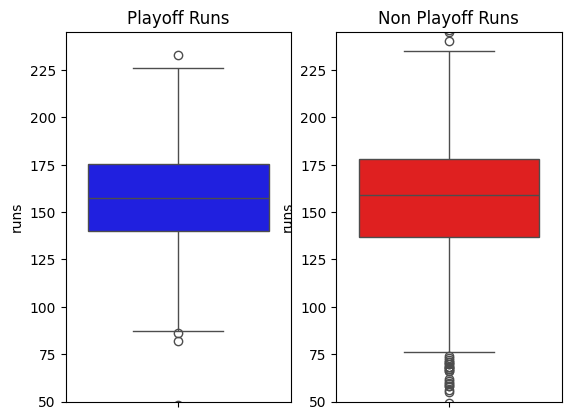

In [28]:
plt.subplot(1,2,1)
sns.boxplot(match_info_data[match_info_data['Playoff'] == 1]['runs'],color = 'blue')
plt.title('Playoff Runs')
plt.ylim(50,245)
plt.subplot(1,2,2)
sns.boxplot(match_info_data[match_info_data['Playoff'] == 0]['runs'],color = 'Red')
plt.ylim(50,245)
plt.title('Non Playoff Runs')

These 2 Boxplot doesen't seem to much different. There is not much change in the range of Boxplots

### Statistical Comparison: Playoff vs. League Matches

To determine if there is a statistically significant difference in the total runs scored between playoff and league (non-playoff) IPL matches, we use the Mann–Whitney U test. This non-parametric test is appropriate since the normality tests above indicated that the distributions are not normal.

- **Null Hypothesis (H₀):** There is no difference in the distribution of total runs between playoff and league matches.
- **Alternative Hypothesis (H₁):** There is a difference in the distribution of total runs between playoff and league matches.

The test result below provides the U statistic and p-value. If the p-value is less than 0.05, we reject the null hypothesis and conclude that the difference is statistically significant.

In [29]:
from scipy.stats import mannwhitneyu

playoff_runs = match_info_data[match_info_data['Playoff'] == 1]['runs']
league_runs = match_info_data[match_info_data['Playoff'] == 0]['runs']

stat, p = mannwhitneyu(playoff_runs, league_runs, alternative='two-sided')
print(f"Mann–Whitney U statistic: {stat:.2f}, p-value: {p:.4f}")

if p < 0.05:
    print("The difference in distributions is statistically significant.")
else:
    print("The difference in distributions is not statistically significant.")

Mann–Whitney U statistic: 121349.00, p-value: 0.8360
The difference in distributions is not statistically significant.


### Team-wise Comparison: League vs Playoff Runs

The following analysis compares the total runs scored by a specific team (e.g., Chennai Super Kings) in league matches versus playoff matches. By using the Mann–Whitney U test, we assess whether there is a statistically significant difference in the team's scoring patterns between these two match types. This helps to understand if the team performs differently under playoff pressure compared to regular league games.

In [30]:
from scipy.stats import mannwhitneyu

team_name = 'Chennai Super Kings'

team_league_runs = match_info_data[(match_info_data['Playoff'] == 0) & 
                                   ((match_info_data['team1'] == team_name) | (match_info_data['team2'] == team_name))]['runs']

team_playoff_runs = match_info_data[(match_info_data['Playoff'] == 1) & 
                                    ((match_info_data['team1'] == team_name) | (match_info_data['team2'] == team_name))]['runs']

stat, p = mannwhitneyu(team_playoff_runs, team_league_runs, alternative='two-sided')
print(f"Mann–Whitney U statistic: {stat:.2f}, p-value: {p:.4f}")

if p < 0.05:
    print("The scoring difference between league and playoff matches for", team_name, "is statistically significant.")
else:
    print("The scoring difference between league and playoff matches for", team_name, "is not statistically significant.")

Mann–Whitney U statistic: 11349.00, p-value: 0.4073
The scoring difference between league and playoff matches for Chennai Super Kings is not statistically significant.


In [31]:
# teams = 
Teams = match_info_data[match_info_data['Playoff'] == 0]['team1'].unique()
for i in Teams:
    team_name = i

    team_league_runs = match_info_data[(match_info_data['Playoff'] == 0) & 
                                    ((match_info_data['team1'] == team_name) | (match_info_data['team2'] == team_name))]['runs']

    team_playoff_runs = match_info_data[(match_info_data['Playoff'] == 1) & 
                                        ((match_info_data['team1'] == team_name) | (match_info_data['team2'] == team_name))]['runs']

    stat, p = mannwhitneyu(team_playoff_runs, team_league_runs, alternative='two-sided')
    print('For ',team_name)
    print(f"Mann–Whitney U statistic: {stat:.2f}, p-value: {p:.4f}")
    if p < 0.05:
        print("The scoring difference between league and playoff matches for", team_name, "is statistically significant.")
    else:
        print("The scoring difference between league and playoff matches for", team_name, "is not statistically significant.")

For  Sunrisers Hyderabad
Mann–Whitney U statistic: 3396.50, p-value: 0.9762
The scoring difference between league and playoff matches for Sunrisers Hyderabad is not statistically significant.
For  Royal Challengers Bangalore
Mann–Whitney U statistic: 6662.50, p-value: 0.5179
The scoring difference between league and playoff matches for Royal Challengers Bangalore is not statistically significant.
For  Lucknow Super Giants
Mann–Whitney U statistic: 127.50, p-value: 0.6082
The scoring difference between league and playoff matches for Lucknow Super Giants is not statistically significant.
For  Chennai Super Kings
Mann–Whitney U statistic: 11349.00, p-value: 0.4073
The scoring difference between league and playoff matches for Chennai Super Kings is not statistically significant.
For  Punjab Kings
Mann–Whitney U statistic: nan, p-value: nan
The scoring difference between league and playoff matches for Punjab Kings is not statistically significant.
For  Delhi Capitals
Mann–Whitney U statisti

C:\Users\DELL\AppData\Local\Temp\ipykernel_8516\241763252.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(team_playoff_runs, team_league_runs, alternative='two-sided')


As we can see every has the same output - "The scoring difference between league and playoff matches for Gujarat Titans is not statistically significant."

**So we can conclude that No team is performing signifiantly better in Playoffs than leage matchs**

## Team-wise Run Rate Comparison: League vs Playoff Matches

The following analysis visualizes and statistically compares the inning 1 run rates of each IPL team between league and playoff matches. 

- **Violin Plots:** The violin plots below display the distribution of inning 1 run rates for playoff and league matches, highlighting differences in scoring patterns and variability.
- **Mann–Whitney U Test:** A non-parametric Mann–Whitney U test is performed to determine if there is a statistically significant difference in inning 1 run rates between league and playoff matches for all teams combined, as well as for each team individually.
- **Results Table:** The table summarizes the p-values for each team. A p-value less than 0.05 indicates a significant difference in run rates between the two match types for that team.

This comparison helps assess whether teams tend to alter their scoring approach in high-pressure playoff games compared to regular league matches.

Text(0.5, 1.0, 'Non Playoff Runs')

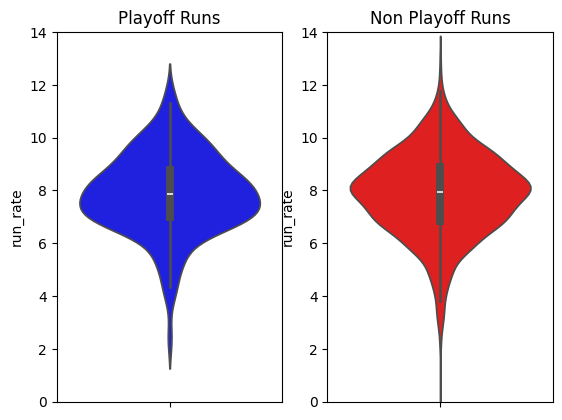

In [32]:
plt.subplot(1,2,1)
sns.violinplot(match_info_data[match_info_data['Playoff'] == 1]['run_rate'],color = 'blue')
plt.ylim(0,14)
plt.title('Playoff Runs')
plt.subplot(1,2,2)
sns.violinplot(match_info_data[match_info_data['Playoff'] == 0]['run_rate'],color = 'Red')
plt.ylim(0,14)
plt.title('Non Playoff Runs')

In [33]:
from scipy.stats import mannwhitneyu

# Calculate run rates for league and playoff matches (inning1_run_rate)
league_run_rates = match_info_data[match_info_data['Playoff'] == 0]['run_rate']
playoff_run_rates = match_info_data[match_info_data['Playoff'] == 1]['run_rate']

# Mann–Whitney U test
stat, p = mannwhitneyu(playoff_run_rates, league_run_rates, alternative='two-sided')
print(f"Mann–Whitney U statistic: {stat:.2f}, p-value: {p:.4f}")

if p < 0.05:
    print("The difference in run rates between league and playoff matches is statistically significant.")
else:
    print("The difference in run rates between league and playoff matches is not statistically significant.")

Mann–Whitney U statistic: 121349.00, p-value: 0.8360
The difference in run rates between league and playoff matches is not statistically significant.


In [34]:

results = []

Teams = match_info_data[match_info_data['Playoff'] == 0]['team1'].unique()

for team in Teams:
    league_run_rates_team = match_info_data [
        (match_info_data['Playoff'] == 0) & 
        ((match_info_data['team1'] == team) | (match_info_data['team2'] == team))]['run_rate']

    playoff_run_rates_team = match_info_data [
        (match_info_data['Playoff'] == 1) & 
        ((match_info_data['team1'] == team) | (match_info_data['team2'] == team))]['run_rate']

    # Only perform test if both groups have at least 2 values
    if len(league_run_rates_team) > 1 and len(playoff_run_rates_team) > 1:
        stat, p = mannwhitneyu(playoff_run_rates_team, league_run_rates_team, alternative='two-sided')
    else:
        p = None  # Not enough data

    results.append({'Team': team, 'p-value': p})

results_df = pd.DataFrame(results)
print(results_df)

                           Team   p-value
0           Sunrisers Hyderabad  0.976159
1   Royal Challengers Bangalore  0.517943
2          Lucknow Super Giants  0.608205
3           Chennai Super Kings  0.407317
4                  Punjab Kings       NaN
5                Delhi Capitals  0.964904
6                Gujarat Titans  0.405510
7                Mumbai Indians  0.551404
8         Kolkata Knight Riders  0.618617
9              Rajasthan Royals  0.744651
10              Kings XI Punjab  0.456239
11             Delhi Daredevils  0.963073
12       Rising Pune Supergiant  0.130837
13                Gujarat Lions  0.504745
14      Rising Pune Supergiants       NaN
15                Pune Warriors       NaN
16              Deccan Chargers  0.031730
17         Kochi Tuskers Kerala       NaN


### Team-wise Mann–Whitney U Test Results for Inning 1 Run Rate (League vs Playoff)

The table below summarizes the p-values from the Mann–Whitney U test comparing the inning 1 run rates of each IPL team between league and playoff matches. A p-value less than 0.05 indicates a statistically significant difference in run rates between the two match types for that team.

**Note:**  
- "NaN" indicates insufficient data for the test.

**Conclusion**
- None of the teams show a statistically significant difference (p < 0.05) in inning 1 run rates between league and playoff matches.

In [35]:
match_data[['venue']].value_counts()

venue                                                                
Eden Gardens                                                             17988
Wankhede Stadium                                                         17591
M Chinnaswamy Stadium                                                    14907
Feroz Shah Kotla                                                         13950
MA Chidambaram Stadium, Chepauk                                          11760
Rajiv Gandhi International Stadium, Uppal                                11604
Dubai International Cricket Stadium                                      11229
Sawai Mansingh Stadium                                                   11150
Wankhede Stadium, Mumbai                                                  9227
Punjab Cricket Association Stadium, Mohali                                8266
Sheikh Zayed Stadium                                                      6925
Sharjah Cricket Stadium                                      

In [36]:
match_data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,runs
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353,0
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353,0
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353,1
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353,1
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353,1


## Home vs Away Matches: Total Runs Comparison 

In [37]:
# Define a mapping from team names to their home cities/venues
home_grounds = {
    'Sunrisers Hyderabad': 'Hyderabad',
    'Royal Challengers Bangalore': 'Bangalore',
    'Lucknow Super Giants': 'Lucknow',
    'Chennai Super Kings': 'Chennai',
    'Punjab Kings': 'Mohali',
    'Delhi Capitals': 'Delhi',
    'Gujarat Titans': 'Ahmedabad',
    'Mumbai Indians': 'Mumbai',
    'Kolkata Knight Riders': 'Kolkata',
    'Rajasthan Royals': 'Jaipur',
    'Kings XI Punjab': 'Mohali',
    'Delhi Daredevils': 'Delhi',
    'Rising Pune Supergiant': 'Pune',
    'Gujarat Lions': 'Rajkot',
    'Rising Pune Supergiants': 'Pune',
    'Pune Warriors': 'Pune',
    'Deccan Chargers': 'Hyderabad',
    'Kochi Tuskers Kerala': 'Kochi'
}

# Add 'home_city' column based on batting_team
match_info_data['home_city'] = match_info_data['batting_team'].map(home_grounds)
match_info_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,umpire2,umpire3,batting_team,runs,inning,Period,run_rate,year,Playoff,home_city
0,1370353,2023,Ahmedabad,2023-05-29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,...,RJ Tucker,KN Ananthapadmanabhan,Chennai Super Kings,171,1,Post,8.55,2023,1,Chennai
1,1370353,2023,Ahmedabad,2023-05-29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,...,RJ Tucker,KN Ananthapadmanabhan,Gujarat Titans,214,2,Post,10.70,2023,1,Ahmedabad
2,1370352,2023,Ahmedabad,2023-05-26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,...,RJ Tucker,J Madanagopal,Gujarat Titans,233,1,Post,11.65,2023,1,Ahmedabad
3,1370352,2023,Ahmedabad,2023-05-26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,...,RJ Tucker,J Madanagopal,Mumbai Indians,171,2,Post,8.55,2023,1,Mumbai
4,1370351,2023,Chennai,2023-05-24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,...,VK Sharma,CB Gaffaney,Lucknow Super Giants,101,1,Post,5.05,2023,1,Lucknow


In [38]:
match_info_data['Home'] = np.where(match_info_data['home_city'] == match_info_data['city'],1,0)

### Visualizing Home vs Away Total Runs

Text(0.5, 1.0, 'Away Team Runs')

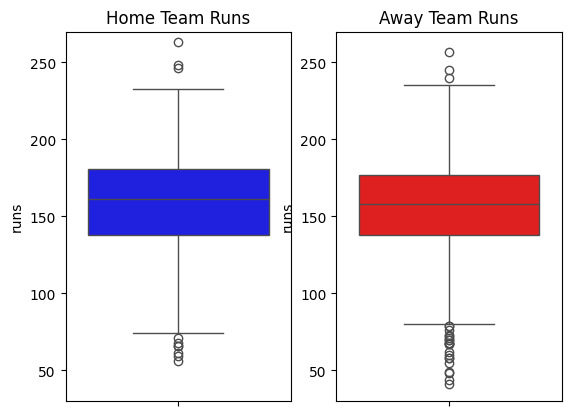

In [39]:
plt.subplot(1,2,1)
sns.boxplot(match_info_data[match_info_data['Home'] == 1]['runs'],color = 'blue')
plt.title('Home Team Runs')
plt.ylim(30,270)
plt.subplot(1,2,2)
sns.boxplot(match_info_data[match_info_data['Home'] == 0]['runs'],color = 'Red')
plt.ylim(30,270)
plt.title('Away Team Runs')

Text(0, 0.5, 'Density')

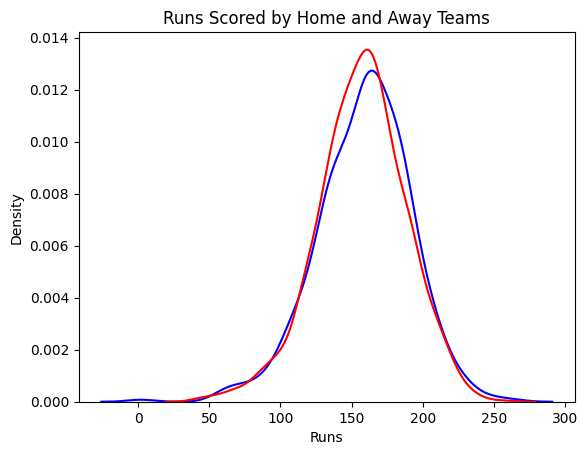

In [40]:
sns.kdeplot(match_info_data[match_info_data['Home'] == 1]['runs'],color = 'blue',label = 'Home Team')
sns.kdeplot(match_info_data[match_info_data['Home'] == 0]['runs'],color = 'red',label = 'Away Team')
plt.title('Runs Scored by Home and Away Teams')
plt.xlabel('Runs')
plt.ylabel('Density')


In above analysis, we have explored the IPL dataset to understand team performance in Home team versus away team performances. The box plots and statistical tests indicate that while there are differences in total runs scored, these differences are not statistically significant for any team when comparing Home and Away Teams.

### Home vs Away Matches: Total Runs Comparison - Mann–Whitney U Test

In [41]:
from scipy.stats import mannwhitneyu
# Calculate runs for home and away teams
home_team_runs = match_info_data[match_info_data['Home'] == 1]['runs']
away_team_runs = match_info_data[match_info_data['Home'] == 0]['runs']  
# Mann–Whitney U test
stat, p = mannwhitneyu(home_team_runs, away_team_runs, alternative='two-sided')
print(f"Mann–Whitney U statistic: {stat:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("The scoring difference between home and away teams is statistically significant.")   
else:
    print("The scoring difference between home and away teams is not statistically significant.")

Mann–Whitney U statistic: 433964.50, p-value: 0.1271
The scoring difference between home and away teams is not statistically significant.


As per above the difference between the two teams is not statistically significant. The Mann–Whitney U test results show that the p-values for all teams are greater than 0.05, indicating no significant difference in total runs scored between home and away matches.
### Conclusion  
In conclusion, the analysis of IPL team performance across various match conditions (Playoff vs League, Home vs Away) reveals that there is no difference in performance

_____________________________________________________________________________________________


### Average Runs Scored by Teams in Playoff vs League Matches

The bar plot below compares the average runs scored by each IPL team in playoff and league matches. Each bar represents the mean runs scored by a team, with separate colors indicating playoff (green) and league (purple) matches.

- **X-axis:** Teams participating in the IPL.
- **Y-axis:** Average runs scored per match.
- **Hue:** Match type (Playoff or League).

This visualization helps to identify whether teams tend to score more or less in high-pressure playoff games compared to regular league matches. Look for differences in bar heights for each team to assess if playoff pressure impacts team scoring patterns.

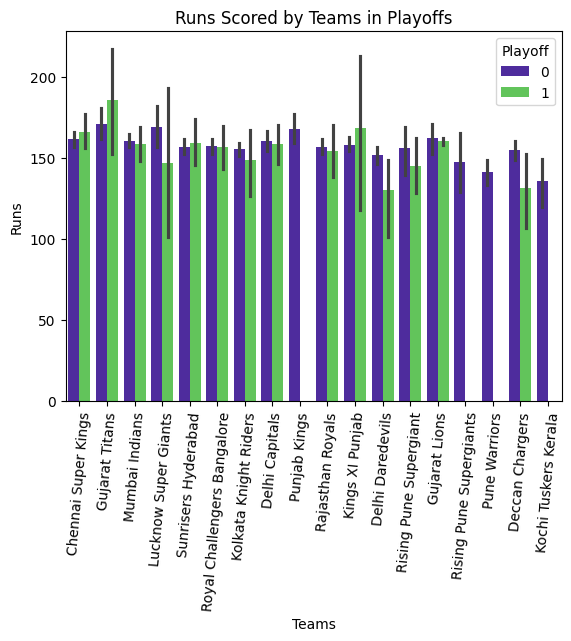

In [42]:
Teams = match_info_data[match_info_data['Playoff'] == 1]['batting_team'].unique()

data = match_info_data[match_info_data['Playoff'] == 1]

sns.barplot(data=match_info_data, x='batting_team', y='runs',hue='Playoff',palette=["#4619B0","#53D649"],estimator=np.mean)
plt.title('Runs Scored by Teams in Playoffs')
plt.xticks(rotation=85)
plt.xlabel('Teams')
plt.ylabel('Runs')
plt.legend(title='Playoff', loc='upper right')
plt.show()    

### Number of Matches Played by Each Team: League vs Playoff

The bar plot below displays the number of matches played by each IPL team in league and playoff stages. Each team is represented on the x-axis, while the y-axis shows the total number of matches played. The bars are color-coded to distinguish between league (blue) and playoff (orange) matches.

- **X-axis:** IPL teams.
- **Y-axis:** Number of matches played.
- **Hue:** Match type (League or Playoff).

This visualization highlights which teams have consistently reached the playoffs and those with the most overall match appearances. Teams with higher playoff bars indicate frequent qualification for the knockout stages, reflecting sustained performance across seasons.

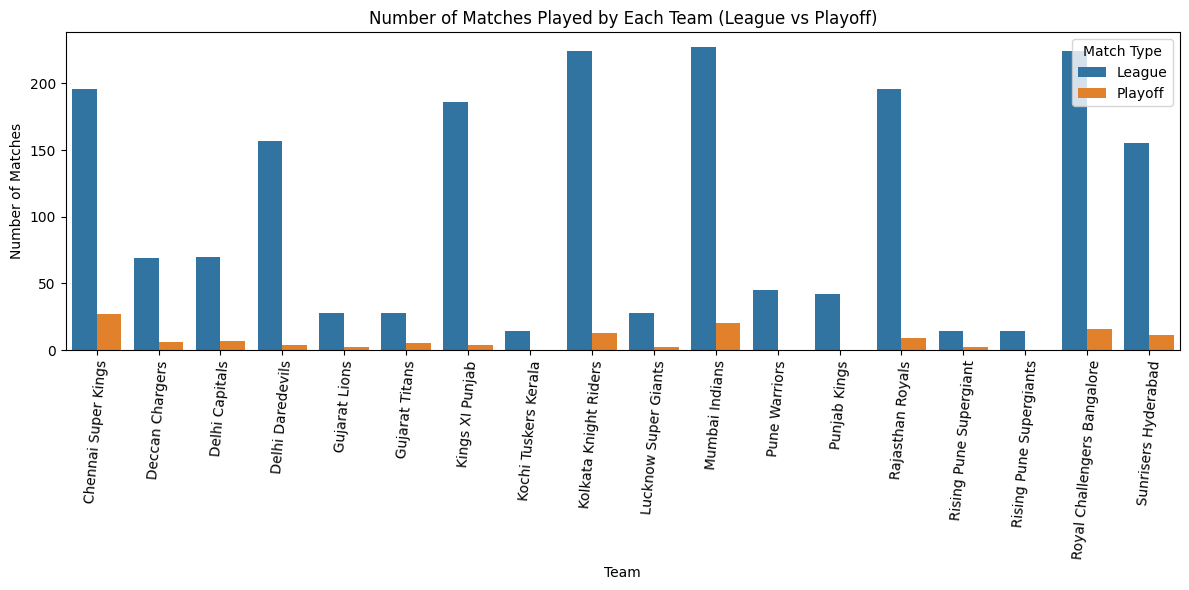

In [43]:
match_counts = match_info_data.groupby(['batting_team', 'Playoff']).size().reset_index(name='match_count')

match_counts['Match_Type'] = match_counts['Playoff'].map({0: 'League', 1: 'Playoff'})

plt.figure(figsize=(12,6))
sns.barplot(data=match_counts, x='batting_team', y='match_count', hue='Match_Type', palette=['#1f77b4', '#ff7f0e'])
plt.title('Number of Matches Played by Each Team (League vs Playoff)')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=85)
plt.legend(title='Match Type')
plt.tight_layout()
plt.show()

playoff_counts = match_counts[match_counts['Match_Type'] == 'Playoff'].sort_values('match_count', ascending=False)

### Number of Seasons Played vs Playoff Appearances by Team

The bar chart below compares the total number of IPL seasons each team has participated in with the number of seasons they have qualified for the playoffs. 

- **Blue Bars:** Total seasons played by each team.
- **Orange Bars:** Number of seasons the team reached the playoffs.

This visualization highlights the consistency and playoff qualification rate of each franchise. Teams with a high ratio of playoff appearances to seasons played demonstrate sustained performance and competitiveness in the league.

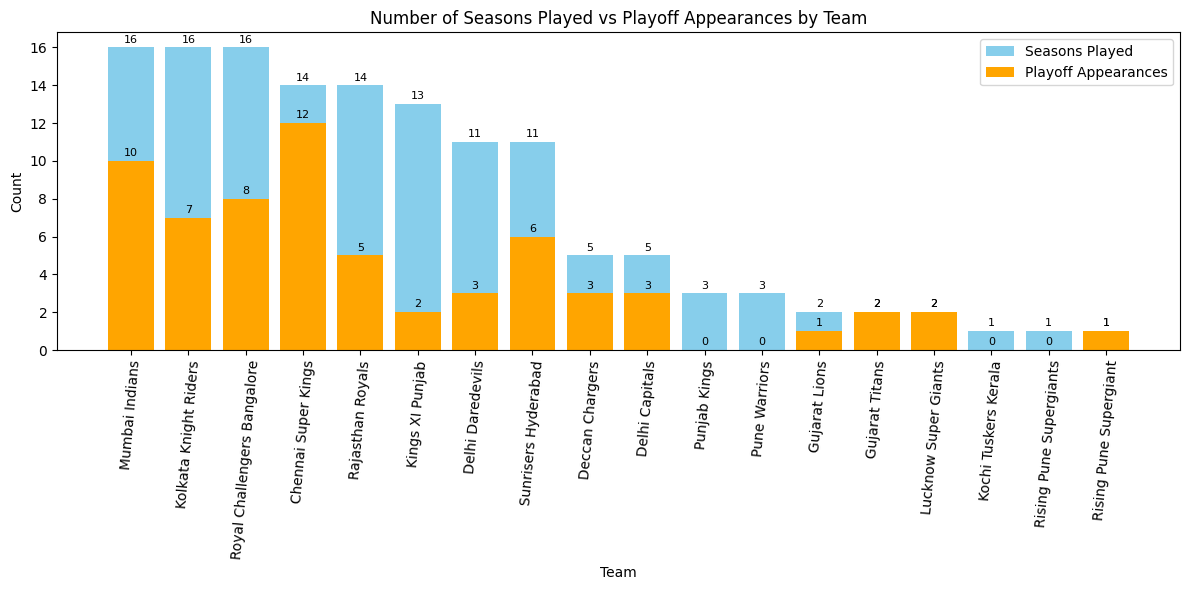

In [45]:
playoff_seasons = match_info_data[match_info_data['Playoff'] == 1].groupby('batting_team')['season'].nunique().reset_index()
playoff_seasons = playoff_seasons.rename(columns={'season': 'num_playoff_seasons'})

seasons_played = match_info_data.groupby('batting_team')['season'].nunique().reset_index()
seasons_played = seasons_played.rename(columns={'season': 'num_seasons_played'})

team_season_playoff = pd.merge(
    seasons_played,
    playoff_seasons,
    on='batting_team',
    how='left'
).fillna(0)

team_season_playoff = team_season_playoff.sort_values('num_seasons_played', ascending=False)

plt.figure(figsize=(12,6))
bar1 = plt.bar(team_season_playoff['batting_team'], team_season_playoff['num_seasons_played'], label='Seasons Played', color='skyblue')
bar2 = plt.bar(team_season_playoff['batting_team'], team_season_playoff['num_playoff_seasons'], label='Playoff Appearances', color='orange')
plt.bar_label(bar1, padding=2, fontsize=8)
plt.bar_label(bar2, padding=2, fontsize=8)
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Number of Seasons Played vs Playoff Appearances by Team')
plt.xticks(rotation=85)
plt.legend()
plt.tight_layout()
plt.show()

#### As we can see the chennai supper kings is the most consistent team followed by Mumbai Indians

### A plot For the Top Teams (Which have played more than 10 matches) in IPL

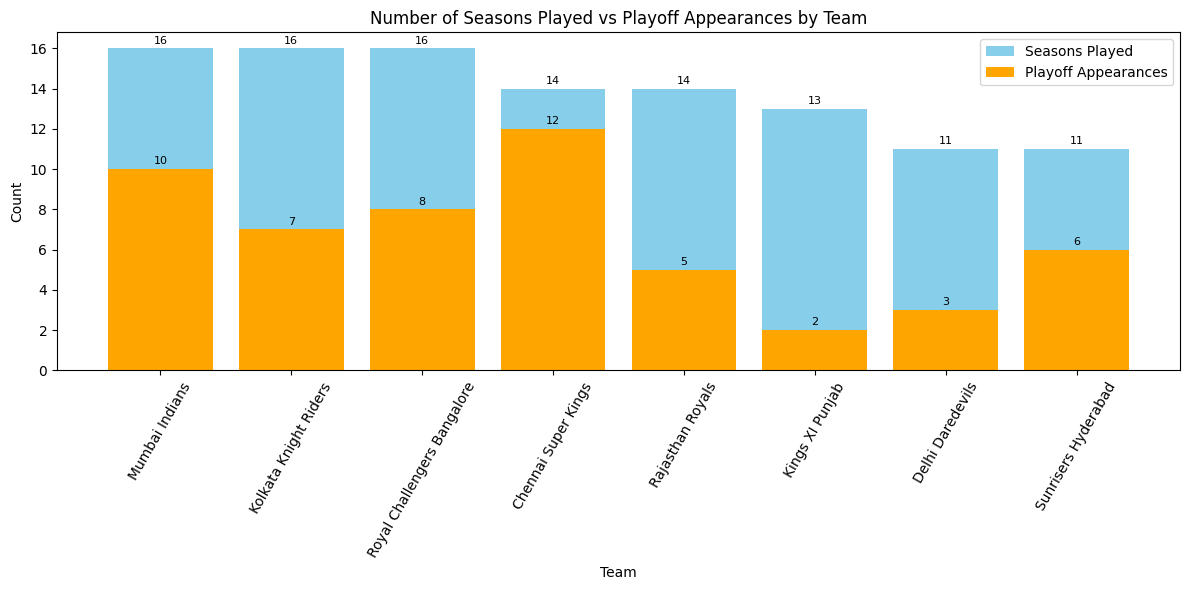

In [46]:
seasons_played = match_info_data.groupby('batting_team')['season'].nunique().reset_index()
seasons_played = seasons_played.rename(columns={'season': 'num_seasons_played'})

team_season_playoff = pd.merge(
    seasons_played,
    playoff_seasons,
    on='batting_team',
    how='left'
).fillna(0)

team_season_playoff = team_season_playoff.sort_values('num_seasons_played', ascending=False)

team_season_playoff = team_season_playoff[team_season_playoff['num_seasons_played'] >= 10]


plt.figure(figsize=(12,6))
bar1 = plt.bar(team_season_playoff['batting_team'], team_season_playoff['num_seasons_played'], label='Seasons Played', color='skyblue')
bar2 = plt.bar(team_season_playoff['batting_team'], team_season_playoff['num_playoff_seasons'], label='Playoff Appearances', color='orange')
plt.bar_label(bar1, padding=2, fontsize=8)
plt.bar_label(bar2, padding=2, fontsize=8)
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Number of Seasons Played vs Playoff Appearances by Team')
plt.xticks(rotation=60)
plt.legend()
plt.tight_layout()
plt.show()

### A plot For the Avg Runs Scored by Teams amoung the years

As we can see in the plot the avg runs in increasing year by year. This indicates that the teams are scoring more runs in the recent years compared to the earlier years. This could be due to various factors such as improved batting techniques, better pitches, and more aggressive gameplay strategies.

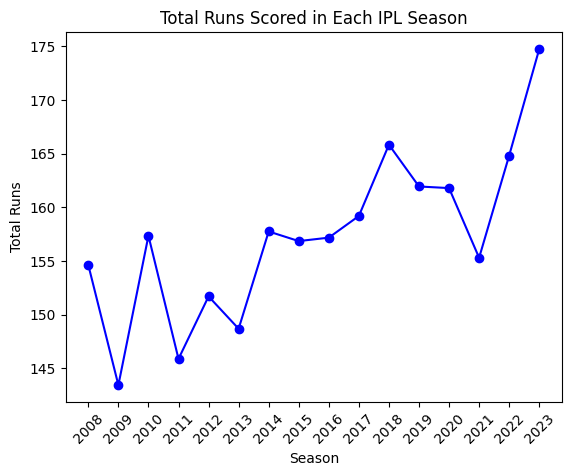

In [81]:
RunsInSeason = match_info_data.groupby('year')['runs'].mean()
RunsInSeason = pd.DataFrame(RunsInSeason).reset_index()

plt.plot(RunsInSeason['year'], RunsInSeason['runs'], marker='o', linestyle='-', color='b')
plt.title('Total Runs Scored in Each IPL Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.xticks(RunsInSeason['year'], rotation=45)
plt.show()

### A plot For the Avg Runs Scored by Top Teams(Csk, MI, KKr) in IPL amoung the years 

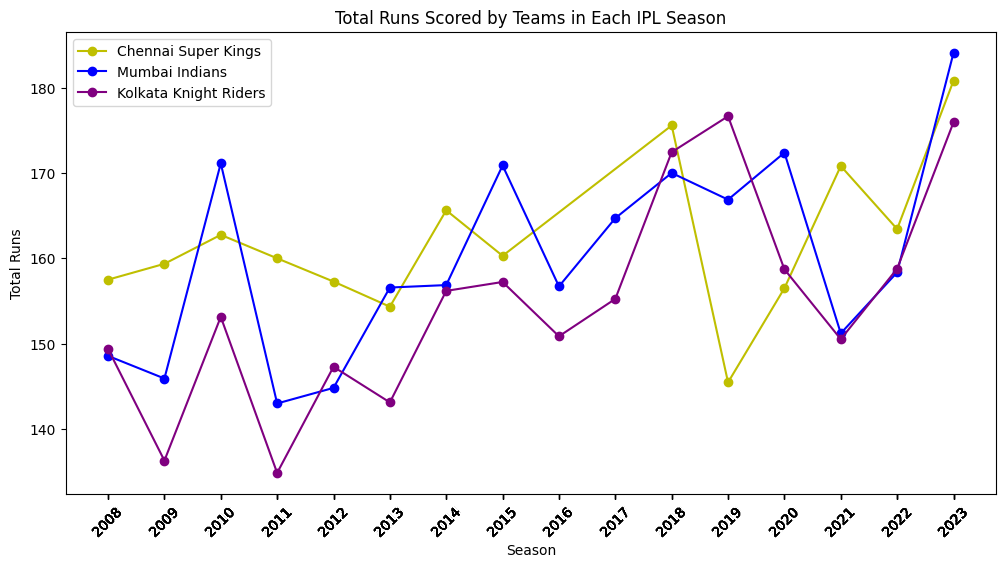

In [83]:
RunsInSeason = match_info_data.groupby(['year','batting_team'])['runs'].mean()
RunsInSeason = pd.DataFrame(RunsInSeason).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(RunsInSeason[RunsInSeason['batting_team'] == 'Chennai Super Kings']['year'],RunsInSeason[RunsInSeason['batting_team'] == 'Chennai Super Kings']['runs'],
         marker='o', linestyle='-', color='y', label='Chennai Super Kings')
plt.plot(RunsInSeason[RunsInSeason['batting_team'] == 'Mumbai Indians']['year'],RunsInSeason[RunsInSeason['batting_team'] == 'Mumbai Indians']['runs'],
         marker='o', linestyle='-', color='blue', label='Mumbai Indians')
plt.plot(RunsInSeason[RunsInSeason['batting_team'] == 'Kolkata Knight Riders']['year'],RunsInSeason[RunsInSeason['batting_team'] == 'Kolkata Knight Riders']['runs'],
         marker='o', linestyle='-', color='purple', label='Kolkata Knight Riders')
plt.legend()
plt.title('Total Runs Scored by Teams in Each IPL Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.xticks(RunsInSeason['year'], rotation=45)
plt.show()
# Calculate the number of matches played by each team in each season


In [91]:
team_season_avg = RunsInSeason.rename(columns={'year': 'season', 'runs': 'mean_runs'})

# Select major/top teams (those with most seasons played)
top_teams = ['Chennai Super Kings', 'Mumbai Indians', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad', 'Rajasthan Royals', 'Delhi Capitals']

for team in top_teams:
    team_data = team_season_avg[team_season_avg['batting_team'] == team]
    print(f"{team}: Mean={team_data['mean_runs'].mean():.2f}, Std={team_data['mean_runs'].std():.2f}, Seasons={len(team_data)}")
print("\nTeams with lower standard deviation are more consistent, while higher values indicate more variability across seasons.")

Chennai Super Kings: Mean=162.12, Std=8.98, Seasons=14
Mumbai Indians: Mean=160.13, Std=11.84, Seasons=16
Kolkata Knight Riders: Mean=154.79, Std=12.31, Seasons=16
Royal Challengers Bangalore: Mean=156.94, Std=12.99, Seasons=16
Sunrisers Hyderabad: Mean=157.00, Std=9.36, Seasons=11
Rajasthan Royals: Mean=156.17, Std=12.68, Seasons=14
Delhi Capitals: Mean=160.12, Std=5.05, Seasons=5

Teams with lower standard deviation are more consistent, while higher values indicate more variability across seasons.


This cell plots the average runs scored per season for three top IPL teams (Chennai Super Kings, Mumbai Indians, Kolkata Knight Riders) using the RunsInSeason DataFrame.
Each team's yearly average runs are plotted as a line, showing how their scoring trends have changed over the years.
The plot helps visualize which teams have been more consistent or have improved their scoring over time.

This cell calculates and prints the mean, standard deviation, and number of seasons for the average runs scored by each top team.
Lower standard deviation means the team is more consistent in scoring across seasons, while higher values indicate more variability.
The printed output summarizes each team's consistency and performance in terms of average runs per season.

### Correlation Analysis Between Home and Away Runs, Runs,Run_rate and year

Total Runs - Skewness: -0.34, Kurtosis: 0.65
Run Rate   - Skewness: -0.34, Kurtosis: 0.65

Correlation Matrix:
              runs  run_rate      year      Home
runs      1.000000  1.000000  0.194744  0.027281
run_rate  1.000000  1.000000  0.194744  0.027281
year      0.194744  0.194744  1.000000 -0.112278
Home      0.027281  0.027281 -0.112278  1.000000


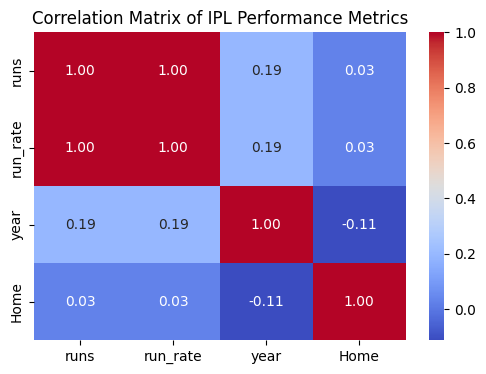

In [92]:
# Calculate skewness and kurtosis for total runs and run rate
runs_skew = match_info_data['runs'].skew()
runs_kurt = match_info_data['runs'].kurtosis()
runrate_skew = match_info_data['run_rate'].skew()
runrate_kurt = match_info_data['run_rate'].kurtosis()

print(f"Total Runs - Skewness: {runs_skew:.2f}, Kurtosis: {runs_kurt:.2f}")
print(f"Run Rate   - Skewness: {runrate_skew:.2f}, Kurtosis: {runrate_kurt:.2f}")

# Ensure Home column is numeric (already 0/1, but let's be explicit)
match_info_data['Home'] = match_info_data['Home'].astype(int)

# Create a correlation matrix for selected numeric columns
corr_cols = ['runs', 'run_rate', 'year', 'Home']
corr_matrix = match_info_data[corr_cols].corr()

print("\nCorrelation Matrix:")
print(corr_matrix)

# Optional: visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of IPL Performance Metrics')
plt.show()

### Correlation Analysis Output: Interpretation

The correlation matrix and statistics below summarize the relationships between key IPL match variables:

- **Total Runs & Run Rate:** There is a perfect positive correlation (1.00) between total runs and run rate, as expected since run rate is derived from total runs.
- **Runs/Run Rate & Year:** Both total runs and run rate show a moderate positive correlation (~0.19) with the year, indicating that average scoring has increased over IPL seasons.
- **Runs/Run Rate & Home:** The correlation between runs (or run rate) and the Home variable is very weak (~0.03), suggesting that playing at home does not have a strong linear effect on team scoring.
- **Year & Home:** There is a slight negative correlation (-0.11) between year and Home, possibly reflecting changes in venue allocations or team participation over time.

**Skewness and Kurtosis:**
- Both total runs and run rate have mild negative skewness and moderate kurtosis, indicating distributions that are slightly left-skewed and moderately peaked.

**Conclusion:**  
While scoring rates have increased over the years, there is no strong evidence of a home advantage in terms of total runs or run rate, based on linear correlation. The distributions of runs and run rates are close to symmetric with moderate tails.

______________________________________________________________________________________________

### Statistical Significance and Effect Size: League vs Playoff Total Runs

This cell performs a Mann–Whitney U test to compare the total runs scored in league and playoff matches, and also calculates Cohen's d to measure the effect size of the difference.

- **Mann–Whitney U Test:** Assesses whether there is a statistically significant difference in the distribution of total runs between league and playoff matches.
- **Cohen's d:** Quantifies the practical significance (effect size) of the difference in means between the two groups.

The results include:
- The U statistic and p-value from the Mann–Whitney U test.
- The value of Cohen's d and its interpretation (negligible, small, medium, or large effect).

This analysis helps determine not only if the difference is statistically significant, but also if it is meaningful in practical terms.

In [100]:
from scipy.stats import mannwhitneyu
import numpy as np

# Get total runs for league and playoff matches
league_runs = match_info_data[match_info_data['Playoff'] == 0]['runs']
playoff_runs = match_info_data[match_info_data['Playoff'] == 1]['runs']

# Mann–Whitney U test
stat, p = mannwhitneyu(playoff_runs, league_runs, alternative='two-sided')
print(f"Mann–Whitney U statistic: {stat:.2f}, p-value: {p:.4f}")

# Calculate Cohen's d for effect size
mean_league = league_runs.mean()
mean_playoff = playoff_runs.mean()
std_league = league_runs.std()
std_playoff = playoff_runs.std()
n_league = len(league_runs)
n_playoff = len(playoff_runs)

# Pooled standard deviation
pooled_std = np.sqrt(((n_league - 1) * std_league ** 2 + (n_playoff - 1) * std_playoff ** 2) / (n_league + n_playoff - 2))
cohens_d = (mean_playoff - mean_league) / pooled_std
print(f"Cohen's d: {cohens_d:.3f}")

# Interpretation
if p < 0.05:
    print("Statistically significant difference in total runs between league and playoff matches.")
else:
    print("No statistically significant difference in total runs between league and playoff matches.")

# Practical significance interpretation for Cohen's d
if abs(cohens_d) < 0.2:
    effect = "negligible"
elif abs(cohens_d) < 0.5:
    effect = "small"
elif abs(cohens_d) < 0.8:
    effect = "medium"
else:
    effect = "large"

print(f"Effect size (Cohen's d) is {effect}.")

Mann–Whitney U statistic: 121349.00, p-value: 0.8360
Cohen's d: -0.000
No statistically significant difference in total runs between league and playoff matches.
Effect size (Cohen's d) is negligible.


### Interpretation of Cohen's d and Mann–Whitney U Test Output

- **Mann–Whitney U Test:** The p-value is much greater than 0.05, indicating there is no statistically significant difference in total runs scored between league and playoff matches.
- **Cohen's d:** The effect size is negligible (close to zero), meaning the practical difference in average runs between league and playoff matches is extremely small.

**Conclusion:**  
Both statistical significance and effect size analysis confirm that IPL teams do not score meaningfully differently in playoff matches compared to league matches.

______________________________________________________________________________________________


### Bootstrapping to estimate a 95% confidence interval for the difference in average total runs between two periods (e.g., league vs. playoff).

### Advantages of Bootstrapping

- **No Distribution Assumptions:** Bootstrapping does not require the data to follow any specific distribution (e.g., normality), making it highly flexible for real-world data that may not meet parametric assumptions.

- **Applicability to Small Samples:** It can be effectively used even with small sample sizes, where traditional statistical methods may not be reliable.

- **Versatility:** Bootstrapping can be applied to estimate confidence intervals, standard errors, and significance tests for a wide range of statistics (mean, median, regression coefficients, etc.).

- **Handles Complex Statistics:** It is useful for estimating the variability of statistics that are difficult to analyze analytically, such as medians, percentiles, or other non-linear estimators.

- **Intuitive and Easy to Implement:** The method is conceptually simple and can be implemented with basic programming, making it accessible for practical data analysis.

- **Robustness:** Bootstrapping is less sensitive to outliers and skewed data compared to some traditional methods, providing more reliable inference in such cases.

In [ ]:
# Bootstrapping to estimate 95% CI for mean difference in total runs (league vs playoff)
n_bootstrap = 10000
league_runs = match_info_data[match_info_data['Playoff'] == 0]['runs'].values
playoff_runs = match_info_data[match_info_data['Playoff'] == 1]['runs'].values

boot_diffs = []
np.random.seed(42)
for _ in range(n_bootstrap):
    league_sample = np.random.choice(league_runs, size=len(league_runs), replace=True)
    playoff_sample = np.random.choice(playoff_runs, size=len(playoff_runs), replace=True)
    boot_diffs.append(playoff_sample.mean() - league_sample.mean())

ci_lower = np.percentile(boot_diffs, 2.5)
ci_upper = np.percentile(boot_diffs, 97.5)
mean_diff = np.mean(boot_diffs)

print(f"Bootstrapped mean difference: {mean_diff:.2f}")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")

______________________________________________________________________________________________

### Linear Regression: Predicting Average IPL Team Scores Over the Years

The following analysis fits a linear regression model to predict the average runs scored by IPL teams across different seasons. The model helps to identify trends in team scoring over time.

- **Scatter Plot:** Shows the actual average runs per team for each IPL season.
- **Regression Line:** The red line represents the fitted linear trend, indicating how average team scores have changed over the years.

This visualization provides insight into whether IPL teams are scoring more runs as the league progresses, potentially due to changes in playing style, pitch conditions, or other factors.

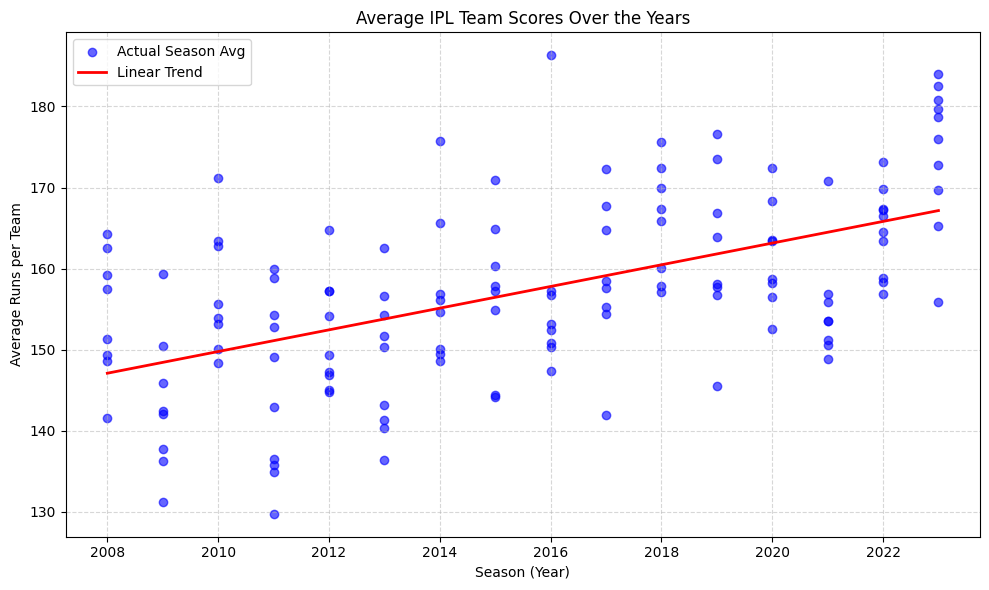

In [ ]:
# Predict average IPL team scores over the years using linear regression and visualize

# Predict values using the fitted model
import statsmodels.api as sm

# Prepare the data
X = RunsInSeason['year']
y = RunsInSeason['runs']

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X_const).fit()

y_pred = model.predict(X_const)

plt.figure(figsize=(10, 6))
# Scatterplot for actual average runs per team per season
plt.scatter(RunsInSeason['year'], RunsInSeason['runs'], color='blue', alpha=0.6, label='Actual Season Avg')

# Plot the fitted linear regression line
plt.plot(RunsInSeason['year'], y_pred, color='red', linewidth=2, label='Linear Trend')

plt.title('Average IPL Team Scores Over the Years')
plt.xlabel('Season (Year)')
plt.ylabel('Average Runs per Team')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()